In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
outDir='ptq'
runs = ['minion_1016', 'kraken_1043', 'minion_1012','enigma_1281', 'enigma_1282']
colorDict = {'minion_1016':'k', 'kraken_1043':'r', 'minion_1012':'g', 'enigma_1281':'b', 'enigma_1282':'y'}
labelDict = {'minion_1016':'baseline (minion_1016)', 'kraken_1043':'no pairs (kraken_1043)', 
             'minion_1012':'pairs (minion_1012)', 
             'enigma_1281':'triples (enigma_1281)', 'enigma_1282':'quads (enigma_1282)'}


Querying database with no constraint.
Found 2447931 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2509335 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2421933 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2414737 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2396597 visits
Running:  [0]
Completed metric genera

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 1.000000 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


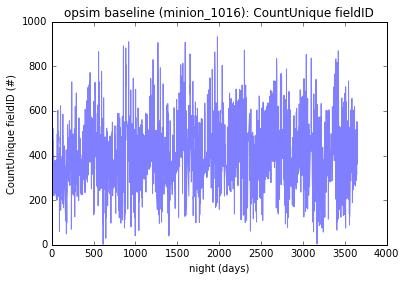

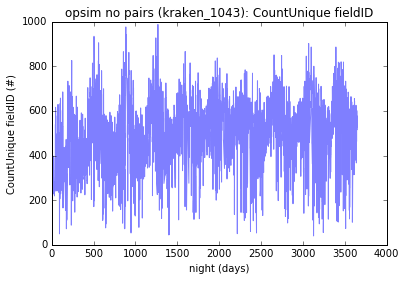

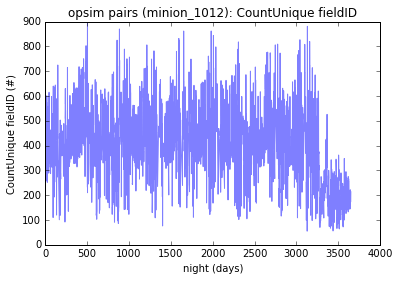

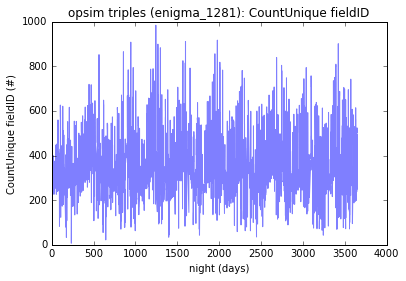

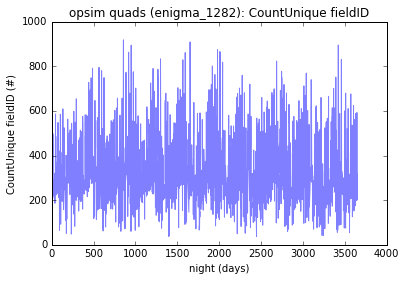

In [3]:
# Look at how many unique fields are observed each night
bundleList = []
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
sql=''
resultsDb = db.ResultsDb(outDir=outDir)

for runName in runs:
    metadata=labelDict[runName]
    opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/'+runName+'_sqlite.db')
    metric = metrics.CountUniqueMetric(col='fieldID')
    summaryStats = [metrics.MedianMetric()]
    bundle = metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=summaryStats,
                                       metadata=metadata)
    bundleList.append(bundle)
    group = metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                            outDir=outDir, resultsDb=resultsDb)
    group.runAll()
    group.plotAll(closefigs=False)

In [4]:
print 'run, median number of unique fields per night'
for bund,run in zip(bundleList,runs):
    print labelDict[run], bund.summaryValues['Median']

run, median number of unique fields per night
baseline (minion_1016) 392.0
no pairs (kraken_1043) 517.0
pairs (minion_1012) 405.0
triples (enigma_1281) 322.0
quads (enigma_1282) 283.0


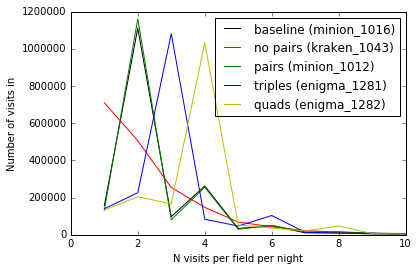

In [7]:
# Find the number of singles, pairs, tripples, etc
sqliteDir = '/Users/yoachim/Scratch/Opsim_sqlites/'
sql = 'filter = "g" or filter="r" or filter="i" or filter="z"'

for run in runs:
    opsdb = db.OpsimDatabase(sqliteDir + run + '_sqlite.db')
    fields = opsdb.fetchFieldsFromFieldTable()
    data = opsdb.fetchMetricData(['night','fieldID'], sql)
    nightBins = np.arange(data['night'].min(), data['night'].max() +2) -0.5
    fIDBins = np.arange(data['fieldID'].min(), data['fieldID'].max() +2) -0.5
    H,xe,ye = np.histogram2d(data['night'], data['fieldID'], bins=[nightBins,fIDBins])
    bins = np.arange(0.5, H.max()+2)
    finalHist, finalBins = np.histogram(H.ravel(), bins)
    x = np.arange(1,finalHist.size+1)
    plt.plot(x, finalHist*x, color=colorDict[run], label=labelDict[run])
plt.xlim([0,10])
plt.ylabel('Number of visits in')
plt.xlabel('N visits per field per night')
plt.legend()
plt.savefig('ptq/NvisitStats.pdf')